# <center> Forest Fire Regression

<br><br>
#### <center> **Realized by :** Siwar MHADHBI - Eya GHAMGUI - Hamza MEDDEB - Roua MAKHLOUF

## Summary 

1. Introduction
2. Data Retrieval
3. Prepare Categorical Variables
4. Checking Missing Values
5. Data Visualisation
6. Removing outliers
7. Detect Correlated Features
8. PCA
9. Final Data 
10. Logarithmic transformation of the target 'area'
11. Split data
12. Scaling 
13. Regression Models
14. Conclusion

##  Introduction 

Forest fires are one of the most dangerous, devastating and unexpected natural disasters. They have become the focus of worldwide attention due to their rapid spread, their low controllability, and the hazards they pose have varying degrees of impact on human health and safety, the ecological environment and resources, and society and the economy. Forest fire prevention has therefore become a key research topic in the fields of forestry and ecology. The most effective way to control forest fires is to detect them quickly. Thus, installation of developed instruments and implementing prediction systems is now the challenge that everyone is facing in order to cease this phenomenon.
    <br><br>
In this project, we will work on the local perception analysis. By establishing a forest fire prediction model, we can predict the area of the forest fire. Hence, we aim at exploring our dataset and building several machine learning models and deep learning techniques in order to improve the quality of the prediction of forest fires in the northeast region of Portugal.

#### Importing Libraries and Methods

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as RandomizedPCA

from tensorflow.keras.layers import Dense , BatchNormalization, Input , Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.preprocessing import OneHotEncoder
import rfpimp

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [12, 5]
sns.set()

##  Data Retrieval

In [ ]:
in_dd = pd.read_csv('forestfires.csv') 
in_dd.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**Data Shape**

In [ ]:
in_dd.shape

(517, 13)

**Comments:**

> * Our data contains $12$ features and $517$ samples to work on.
> * The $12$ features of our forest fires database are as follows: 
     1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
     2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
     3. month - month of the year: "jan" to "dec" 
     4. day - day of the week: "mon" to "sun"
     5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
     6. DMC - DMC index from the FWI system: 1.1 to 291.3 
     7. DC - DC index from the FWI system: 7.9 to 860.6 
     8. ISI - ISI index from the FWI system: 0.0 to 56.10
     9. temp - temperature in Celsius degrees: 2.2 to 33.30
     10. RH - relative humidity in %: 15.0 to 100
     11. wind - wind speed in km/h: 0.40 to 9.40 
     12. rain - outside rain in mm/m2 : 0.0 to 6.4 <br><br>
> * Our output variable **Y** is **area** that represents the burned area of the forest (in ha) which is between 0.00 and 1090.84 <br><br>
> $\Rightarrow$ We can clearly notice that there is a very limited number of samples in the data which might pose problems later for the models accuracy.

In [ ]:
# calculating the number of zero values
in_dd.area.value_counts()[0]

247

**Comments:**

> This is particualy concerning considering we have 247 or 47.776% of cases with 0 hectors burned.

##  Prepare Categorical Variables 

In order to be able to build regression models, we converted the categorical features **'month'** and **'day'** into numerical ones using Ordinal encoding which means that for every month we assign a number from 1 to 12 and for each day we assign a number from 1 to 7.

In [ ]:
dict1 = {'jan' :1 ,'feb' : 2, 'mar': 3, 'apr' : 4, 'may' : 5,'jun' : 6, 'jul': 7,
          'aug' : 8 , 'sep' : 9,  'oct' :10 ,  'nov':11,'dec' : 12  }

dict2 ={'fri':5,'tue':2,'sat':6,'sun':7,'mon':1,'wed':3,'thu':4}

in_dd.month = in_dd.month.replace(dict1)
in_dd.day = in_dd.day.replace(dict2)

In [ ]:
# Resulted data with numerical values 
in_dd.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Checking Missing Values 

In [ ]:
in_dd.isna().sum().to_frame('Nbr of missing values').T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
Nbr of missing values,0,0,0,0,0,0,0,0,0,0,0,0,0


$\Rightarrow$ Our data has no missing values, which won't raise problems during data processing.

## Data Visualisation 

In order to observe relations between different features, we took for most cases the mean for each feature that can have an impact on predicting forest fires (the wind speed, the temperature, the outside rain and the humidity) per month and we plotted the results.

In [ ]:
# Variables to plot 
mean_wind =in_dd.groupby('month')['wind'].mean().to_frame()
mean_RH = in_dd.groupby('month')['RH'].mean().to_frame()
mean_rain = in_dd.groupby('month')['rain'].mean().to_frame()
mean_temp = in_dd.groupby('month')['temp'].mean().to_frame()
mean_area = in_dd.groupby('month')['area'].mean().to_frame()
mean_max = in_dd.groupby('month')['area'].max().to_frame()
months = dict1.keys()

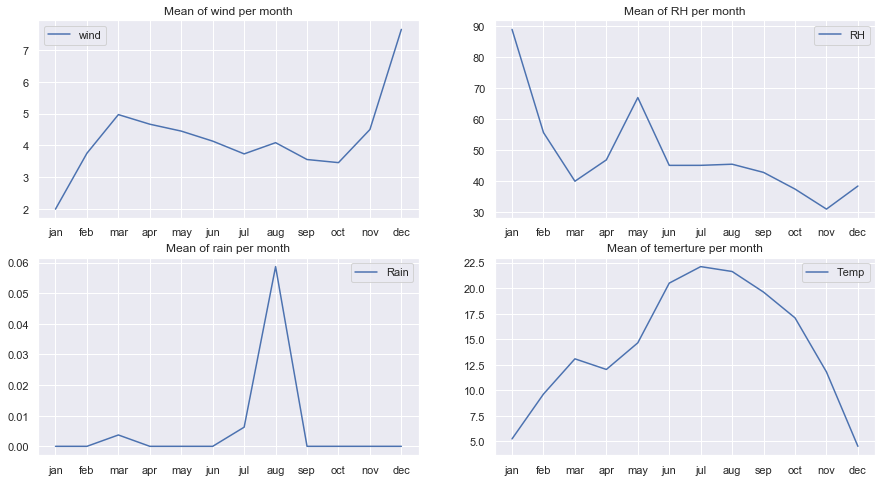

In [ ]:
# Figures
fig,ax = plt.subplots(2,2 , figsize=(15,8))

ax[0][0].plot(list(months),mean_wind,label='wind')
ax[0][0].legend()
ax[0][0].set_title('Mean of wind per month')

ax[0][1].plot(list(months),mean_RH,label='RH')
ax[0][1].legend()
ax[0][1].set_title('Mean of RH per month')

ax[1][0].plot(list(months),mean_rain,label='Rain')
ax[1][0].legend()
ax[1][0].set_title('Mean of rain per month')
     
ax[1][1].plot(list(months),mean_temp,label='Temp')
ax[1][1].legend()
ax[1][1].set_title('Mean of temerture per month')

plt.show()

**Interpretations:**

> - We notice that the average wind plot represents a pic at the end of the year and another pic with less intensity around the month of March. 
<br><br> 
> - The relative humidity is very high at the beginning of the year. It decreases in March and shows another pic in May. 
<br><br> 
> - The rain plot shows a high average value in august. 
<br><br> 
> - The temperture plot increases until it depicts the highest value in summer. After that, it decreses. 

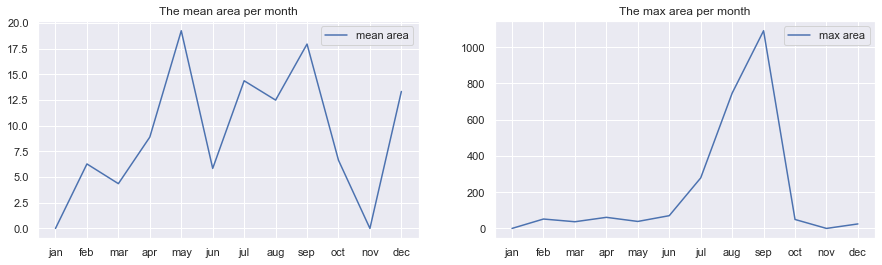

In [ ]:
# Figures
fig,ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(list(months),mean_area,label='mean area')
ax[1].plot(list(months),mean_max,label='max area')
ax[0].legend()
ax[1].legend()
ax[0].set_title('The mean area per month')
ax[1].set_title('The max area per month')
plt.show()

**Interpretations:**

> - According to the figures, we can notice that there's two interisting periods of forest fires, the first one is around Mars and the second one is from July to Septembre. In fact, the two pics in the temperature at these two periods of the year indicate a hot weather that is able to intensify the fires and we can also notice a high wind speed at the beginning of the year around Mars that can be one of the effects that influence the prediction of forest fires.
<br><br>
> - Although the end of the summer seems to be the most rainy period of the year, it's characterised by the biggest burned areas as well.

## Removing outliers 

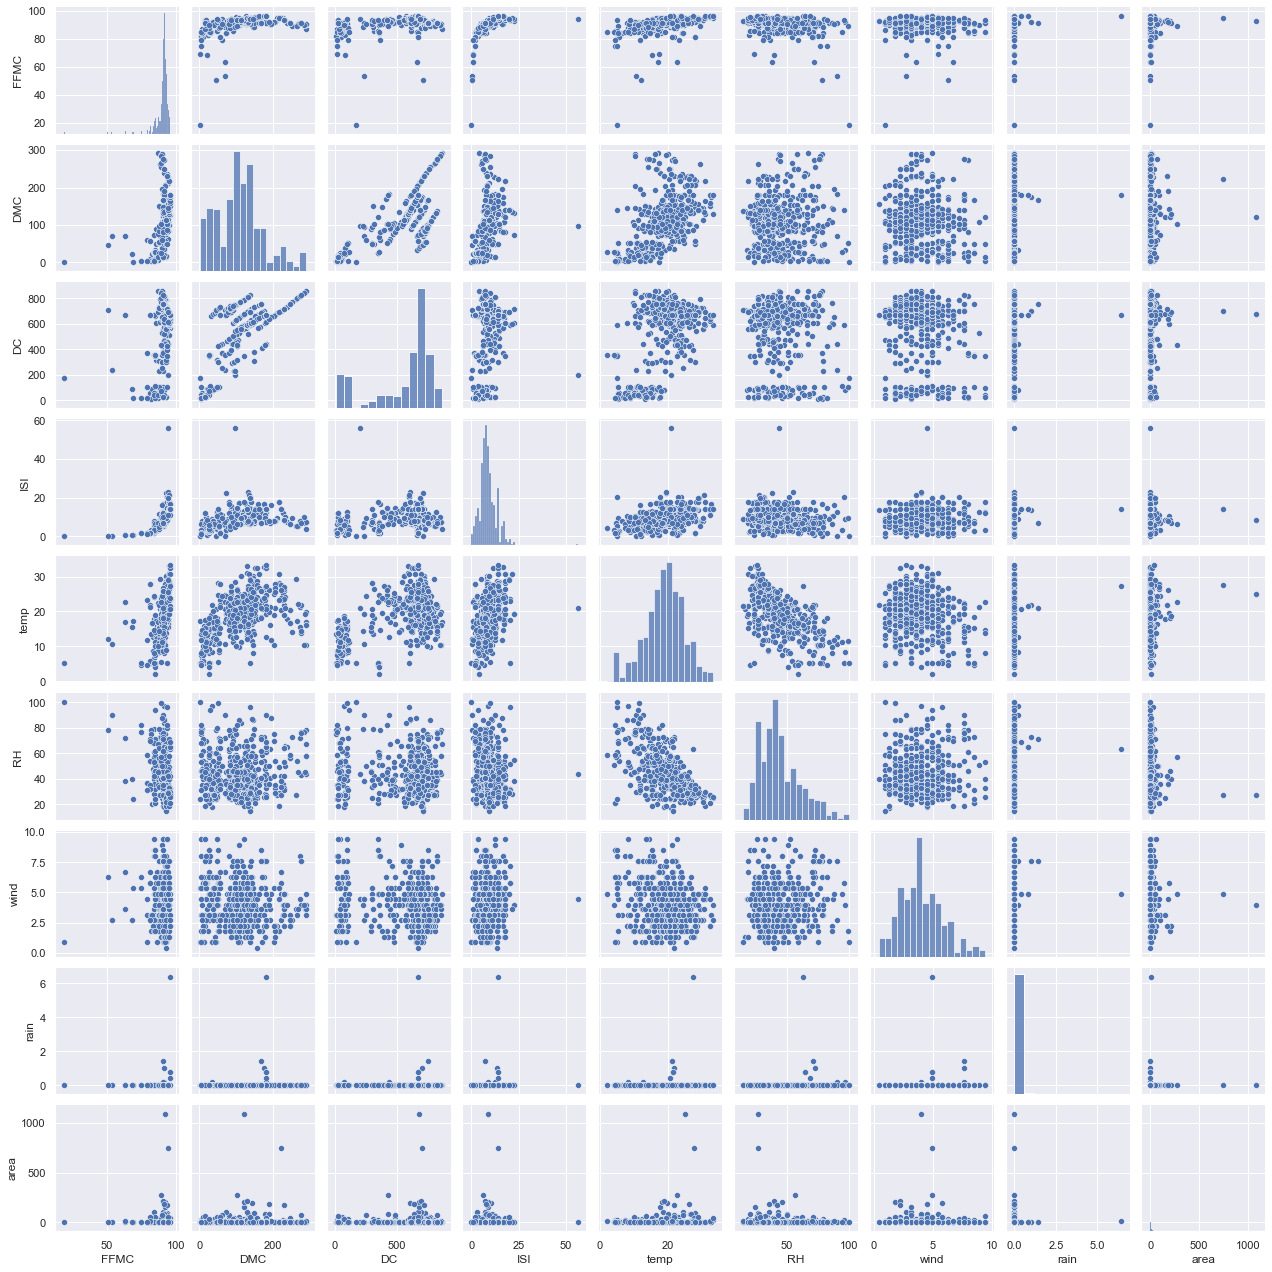

In [ ]:
sns.pairplot(in_dd[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']],height=2);

### 1. FFMC

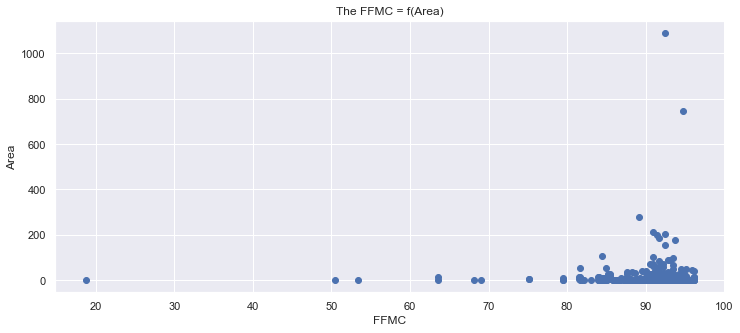

In [ ]:
#plt.figure(figsize=(15,5))
plt.xlabel('FFMC')
plt.ylabel('Area')
plt.title('The FFMC = f(Area)')
plt.scatter(in_dd.FFMC,in_dd.area);

**Comments:**

> * The majority of the forest fires happens with high FFMC rates (above 70).
<br><br> 
$\Longrightarrow$ We took the data corresponding for FFMC bigger than 70.

In [ ]:
# Removing outliers
in_dd=in_dd.loc[in_dd.FFMC > 70]
in_dd=in_dd.loc[in_dd.area < 600]

### 2. ISI

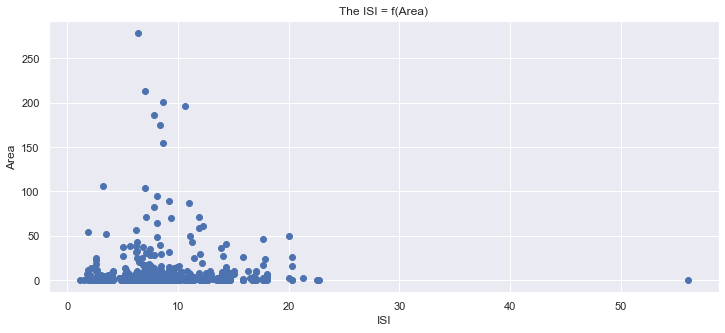

In [ ]:
#plt.figure(figsize=(15,5))
plt.xlabel('ISI')
plt.ylabel('Area')
plt.title('The ISI = f(Area)')
plt.scatter(in_dd.ISI,in_dd.area);

**Comments:**

> * All of the incidents almost occur with ISI index less than 30.
<br><br> 
$\Longrightarrow$ We took the data corresponding for ISI lower than 30.

In [ ]:
# Removing outliers
in_dd=in_dd.loc[in_dd.ISI <30]
in_dd=in_dd.loc[in_dd.area < 130]

###  3. Results after removing outliers 

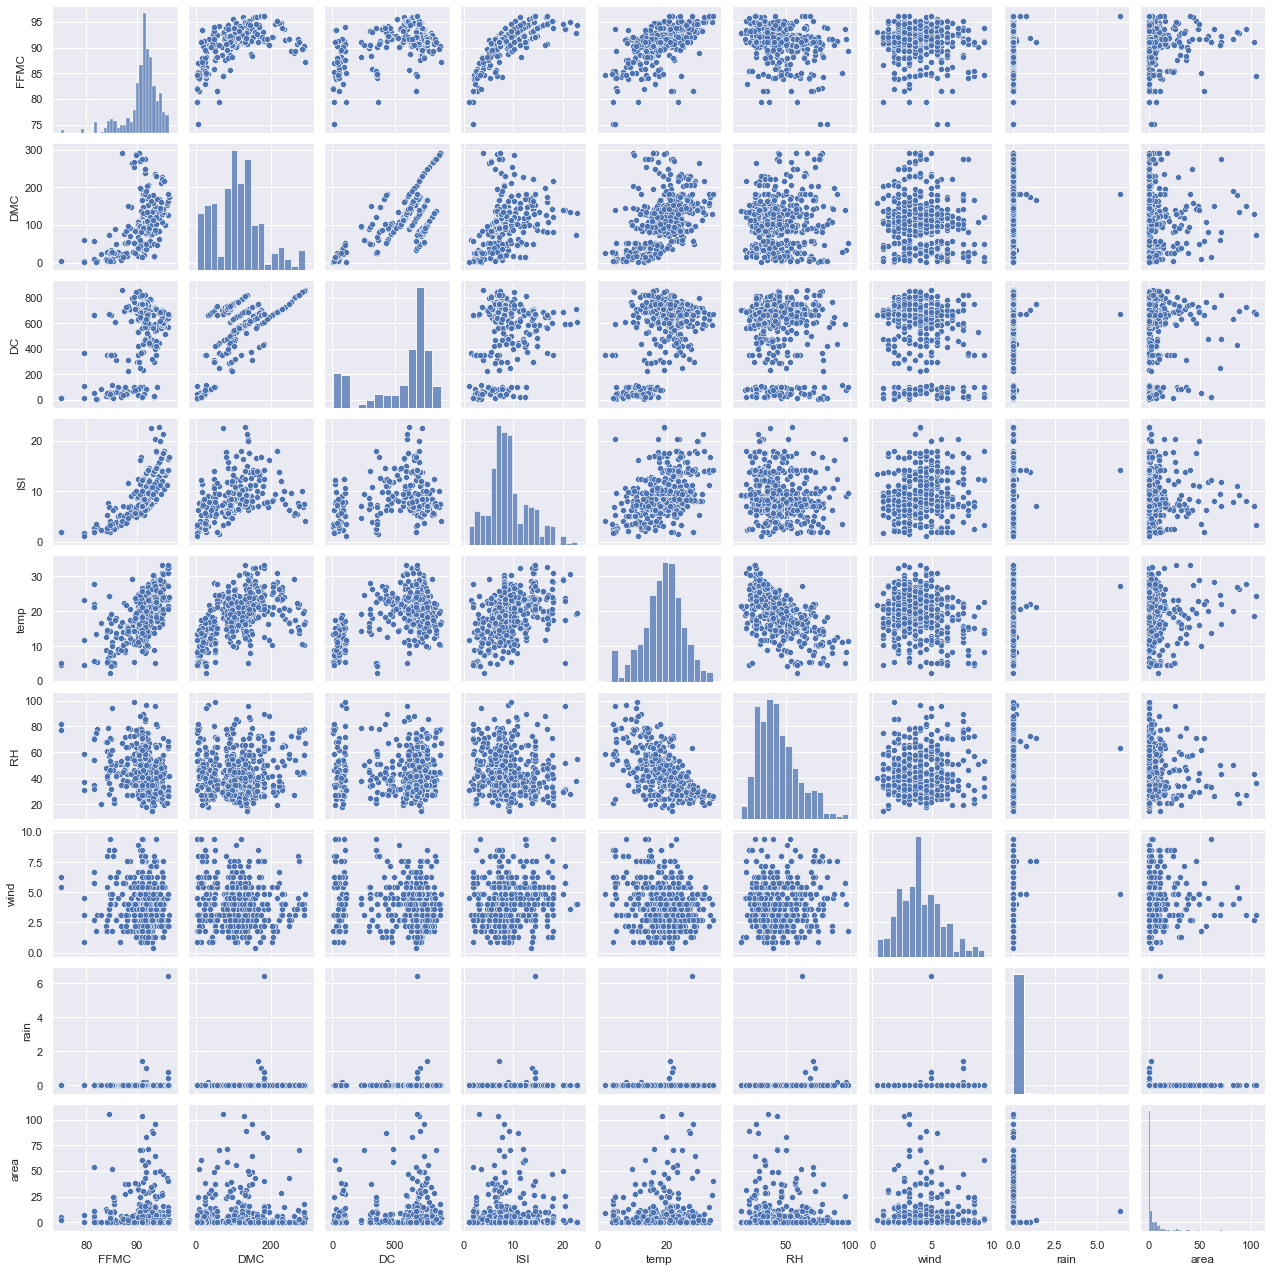

In [ ]:
sns.pairplot(in_dd[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']],height=2);

## Detect Correlated Features 

In [ ]:
col_ = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area']
df1 = in_dd[col_]

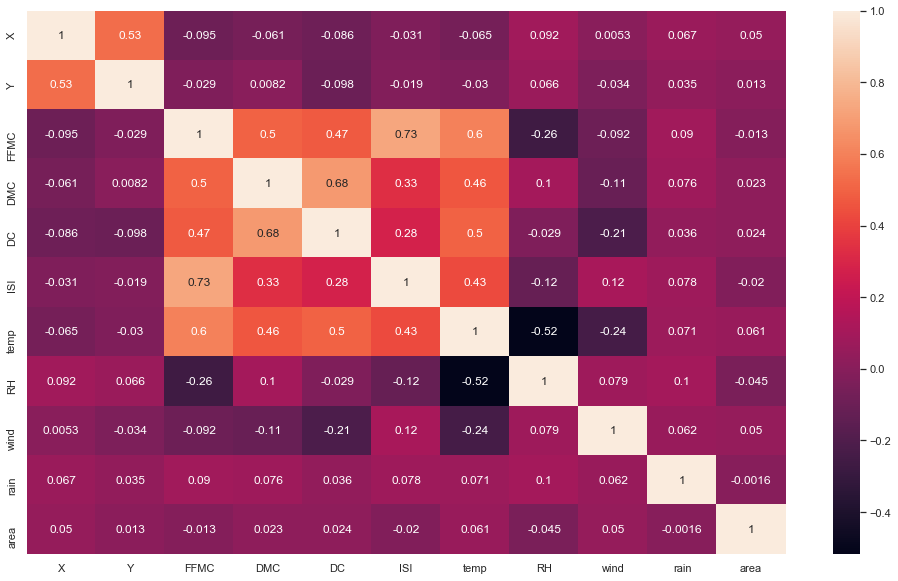

In [ ]:
# Correlation Matrix
plt.figure(figsize=(17,10))
sns.heatmap(df1.corr(),annot=True );

**Interpretation:**

> After removing the outliers and plotting the correlation matrix, we can notice that some features like month, FFMC, DMC, DC, ISI and tmp are highly correlated which can totally affect our models later, for that we have selected these features to apply the PCA algorithm, one of the helpful tools to remove these correlations, and create new features that represents the data while respecting the same variance explained form the data. 

## PCA

In [ ]:
# Chosen features to apply the PCA
col = ['month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp']
df = in_dd[col]

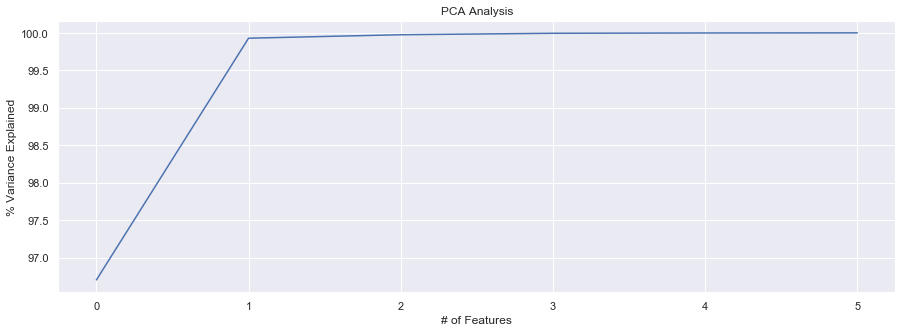

In [ ]:
# Determine the number of components 
pca = RandomizedPCA(random_state=0)
pca.fit(df)   
pca.explained_variance_ratio_ 
var=np.cumsum(pca.explained_variance_ratio_*100)

# Plot the cumulative variance 
plt.figure(figsize=(15,5))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(np.arange(len(var)),var)
plt.show()

**Interpretation:**

> From the curve above, we can see clearly that 2 as number of features gives us more than 99% of variance explained. Consequently, we chose the number of components equal to two as the best choice to work with.

In [ ]:
# Transform the data

pca = RandomizedPCA(n_components = 2, random_state=0)
df = pca.fit_transform(df)

in_dd = in_dd.drop(columns=col)
col1 = ['PC1','PC2']
in_dd = (in_dd.merge(pd.DataFrame(df ,index=in_dd.index , columns=col1),on=in_dd.index)).set_index(['key_0'])
in_dd

,X,Y,day,RH,wind,rain,area,PC1,PC2
key_0,,,,,,,,,
0,7,5,5,51,6.7,0.0,0.00,463.179541,-2.089911
1,7,4,2,33,0.9,0.0,0.00,-104.087742,-96.005272
2,7,4,6,33,1.3,0.0,0.00,-123.045543,-91.104646
3,8,6,5,97,4.0,0.2,0.00,478.380652,8.056820
4,8,6,7,99,1.8,0.0,0.00,450.833078,21.353695
...,...,...,...,...,...,...,...,...,...
512,4,3,7,32,2.7,0.0,6.44,-104.485191,-74.441482
513,2,4,7,71,5.8,0.0,54.29,-104.416787,-74.555128
514,7,4,7,70,6.7,0.0,11.16,-104.408672,-74.568612


## Final Data 

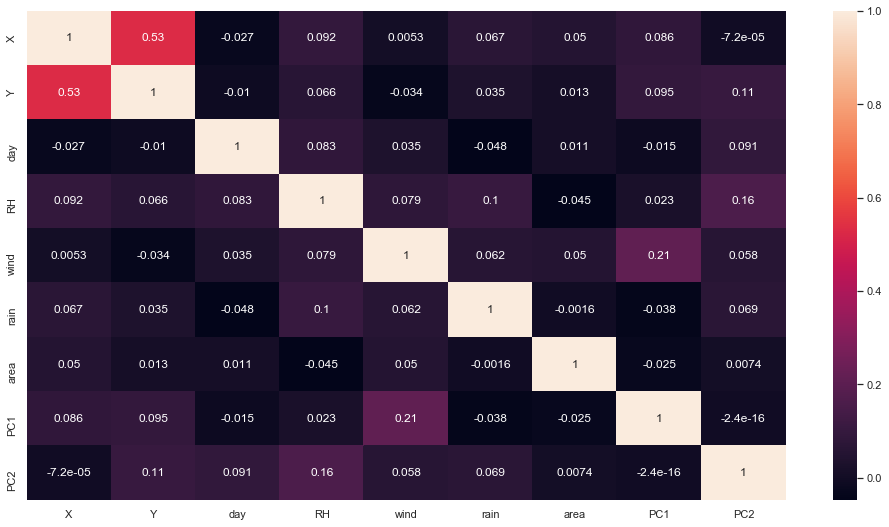

In [ ]:
# Correlation Matrix
col_2 = ['X', 'Y', 'RH', 'wind', 'rain','PC1','PC2','area']
df2 = in_dd[col_2]

plt.figure(figsize=(17,9))
sns.heatmap(in_dd.corr(),annot=True );

**Interpretation:**

> In this step, we have projected the data of 5 dimensions in just 2 dimensions which allows us to remove correlation between features and obtain the new data displayed above.

## Logarithmic transformation of the target 'area'

Since the output variable **area** has a lot of values close to zero meaning that it is vary skewed towards 0 (as we can see from the left curve below) and given the fact that this would certainly affect our models, we transformed the output variable **area** to **ln(area + 1)**.

In [ ]:
# Target values
Y = in_dd.area
Y_log = np.log(Y+1)
# Feature values
X = in_dd.drop(columns=['area'])

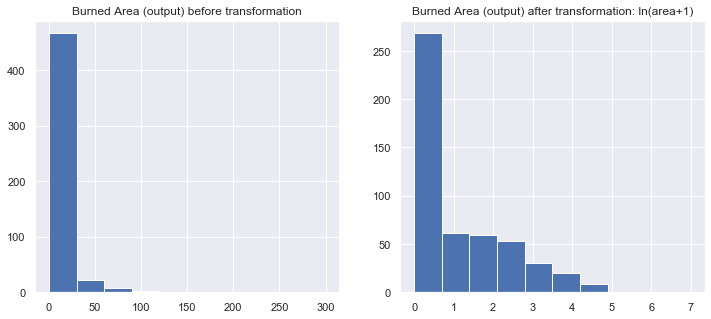

In [ ]:
plt.subplot(121)
plt.hist(Y, range=(0,300))
plt.title('Burned Area (output) before transformation')
plt.subplot(122)
plt.hist(Y_log, range=(0,7))
plt.title('Burned Area (output) after transformation: ln(area+1)')
plt.show()

**Comment:**

> According to these two plots, we can clearly observe that the left histogram shows a positive skweness which is higher than the right histogram which is due to the logarithmic transformation.

## Splitting data 

In [ ]:
# Train test split
X_train, X_test, y_train , y_test = train_test_split(X ,Y_log ,test_size=0.25 ,random_state=0)

## Scaling data

To ensure that each feature play the same role in the training process and to be sure that our models would not be affected by some particular feautures, we need to scale the data.

In [ ]:
# Features to scale
to_scale = ['wind','rain','RH'] + col1
data = X_train[to_scale]

# Scale the data
stdsc = StandardScaler()

data_std = stdsc.fit_transform(data)
data_std = pd.DataFrame(data_std,columns=data.columns,index=data.index)
X_train[to_scale]=data_std

# Make the same transformation on the test data 
data1 = X_test[to_scale]
data1_std = stdsc.transform(data1)
data1_std = pd.DataFrame(data1_std,index=data1.index,columns=data1.columns)
X_test[to_scale] = data1_std

## Regression Models

### 1. SVR 

In [ ]:
# Define parameters for cross validation
param = {'kernel' : ('linear', 'poly', 'rbf'), 'C' : [0.1,0.5,1,5,10],
         'degree' : [3,4,5,6,7,8]}

# Define the model 
SVR_model = SVR()

# Compute cross validation
grids = GridSearchCV(SVR_model, param, cv=5)

# Train the model
grids.fit(X_train,y_train)

# Retrieve best parameters
best_param = grids.best_params_
print('Best parameters = ',best_param)

Best parameters =  {'C': 5, 'degree': 3, 'kernel': 'rbf'}


In [ ]:
# Build the best model
best_model_svr = SVR(C = best_param['C'], degree = best_param['degree'], kernel = best_param['kernel'])

# Train best model
best_model_svr.fit(X_train,y_train)

# Predict
y_pred_svr = best_model_svr.predict(X_test)

# Apply the inverse of the transformation
y_pred_svr_ = np.exp(y_pred_svr)-1
y_test_ = np.exp(y_test)-1

print("Support Vector Regression MAE :", np.round(mean_absolute_error(y_pred_svr_,y_test_),3))
print("Support Vector Regression RMSE :", np.round(mean_squared_error(y_pred_svr_,y_test_,squared=False),3))

Support Vector Regression MAE : 6.787
Support Vector Regression RMSE : 15.469


<br> 

* In order to improve the model since both MAE and RMSE are high, we tried to tune the hyperparameters of the model modifying the values of **gamma** and **epsilon**.

In [ ]:
# Build the best model
best_model_svr_ = SVR(C = best_param['C'], degree = best_param['degree'], kernel = best_param['kernel'],
                      gamma=1, epsilon=0.01)

# Train best model
best_model_svr_.fit(X_train,y_train)

# predict
y_pred_svr = best_model_svr_.predict(X_test)

# apply the inverse of the transformation
y_pred_svr_ = np.exp(y_pred_svr)-1
y_test_ = np.exp(y_test)-1

print("Support Vector Regression MAE :", np.round(mean_absolute_error(y_pred_svr_,y_test_),3))
print("Support Vector Regression RMSE :", np.round(mean_squared_error(y_pred_svr_,y_test_,squared=False),3))

Support Vector Regression MAE : 6.605
Support Vector Regression RMSE : 14.12


**Comment :**

> By tuning some hyperparametrs, we succeded in reaching lower values of MAE and RMSE but they still too high.

### 2. Decision Tree Regression

In [ ]:
# Define parameters for cross validation
param = {'min_samples_split': [2,4,6,8,10,12,14,15], 
         'min_samples_leaf':[2,3,5,7,8,10,12,13,14],
         'max_leaf_nodes': list(range(2, 10))}

# Define the model
Tree_model = DecisionTreeRegressor(random_state=0)

# Compute cross validation
grid_search_cv = GridSearchCV(Tree_model, param,cv=5)

# Train the model
grid_search_cv.fit(X_train, y_train)

# Retrieve best parameters
best_paramdt = grid_search_cv.best_params_
print('Best parameters = ',best_paramdt)

Best parameters =  {'max_leaf_nodes': 3, 'min_samples_leaf': 12, 'min_samples_split': 2}


In [ ]:
# Build the best model
best_Tree_model = DecisionTreeRegressor(min_samples_split = best_paramdt['min_samples_split'],
                                      min_samples_leaf = best_paramdt['min_samples_leaf'],
                                       max_leaf_nodes = best_paramdt['max_leaf_nodes'])
# Train best model
best_Tree_model.fit(X_train,y_train)

# Predict
y_pred_dt = best_Tree_model.predict(X_test)

# Apply the inverse of the transformation
y_pred_dt_ = np.exp(y_pred_dt)-1
y_test_ = np.exp(y_test)-1

print("Decision Tree MAE :", np.round(mean_absolute_error(y_pred_dt_,y_test_),3))
print("Decision Tree RMSE :", np.round(mean_squared_error(y_pred_dt_,y_test_,squared=False),3))

Decision Tree MAE : 7.093
Decision Tree RMSE : 15.209


**Interpretations:**

> * Although MAE and RMSE have almost very close values for both SVR and Decision Tree models, the decision tree seems to be worse than the SVR for predicting the forest fires.
<br>
> * $\textit{SVR and Decision Tree}$:<br>
Both models are not very sensitive to parameters tuning which means that modifying them is not improving a lot the model and this is expected since we are working with a very small dataset.

### 3. Random Forest Regressor

In [ ]:
# Define parameters for cross validation
param = {'n_estimators': [100, 1000], 'min_samples_split': [2, 3, 4, 5, 6], 'max_features': ['sqrt','log2']}

# Define the model
RF_reg = RandomForestRegressor()

# Compute cross validation
grid_search_cv = GridSearchCV(RF_reg, param, cv=5)

# Train the model
grid_search_cv.fit(X_train, y_train)

# Retrieve best parameters
best_param = grid_search_cv.best_estimator_
print('Best parameters = ',best_param)

Best parameters =  RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=1000)


In [ ]:
# Build the best model
best_RF_model = RandomForestRegressor(min_samples_split=best_param.min_samples_split,
                                      n_estimators=best_param.n_estimators,
                                      max_features=best_param.max_features)
# Train best model
best_RF_model.fit(X_train,y_train)

# Predict
y_pred_rf = best_RF_model.predict(X_test)

# Apply the inverse of the transformation
y_pred_rf_ = np.exp(y_pred_rf)-1

print("Random Forest MAE :", np.round(mean_absolute_error(y_pred_rf_,y_test_),3))
print("Random Forest RMSE :", np.round(mean_squared_error(y_pred_rf_,y_test_,squared=False),3))

Random Forest MAE : 7.004
Random Forest RMSE : 14.998


#### **3.1.  Parameters tuning**

In [ ]:
# Define parameters for cross validation
param = {'max_leaf_nodes': [2,3,4,7,9,12,15], 'max_depth': [2, 3, 4, 5, 6,8,10,12]}

# Compute cross validation
grid_search_cv_2 = GridSearchCV(best_RF_model, param, cv=5)

# Train the model
grid_search_cv_2.fit(X_train, y_train)

# Retrieve best parameters
best_param = grid_search_cv_2.best_estimator_
print('Best parameters = ',best_param)

Best parameters =  RandomForestRegressor(max_depth=5, max_features='sqrt', max_leaf_nodes=2,
                      min_samples_split=6, n_estimators=1000)


In [ ]:
# Build the best model
best_RF_model_ = RandomForestRegressor(max_leaf_nodes=best_param.max_leaf_nodes,
                                      max_depth=best_param.max_depth,
                                      min_samples_split=best_param.min_samples_split)
# Train best model
best_RF_model_.fit(X_train,y_train)

# Predict
y_pred_rf = best_RF_model_.predict(X_test)

# Apply the inverse of the transformation
y_pred_rf_ = np.exp(y_pred_rf)-1

print("Random Forest MAE :", np.round(mean_absolute_error(y_pred_rf_,y_test_),3))
print("Random Forest RMSE :", np.round(mean_squared_error(y_pred_rf_,y_test_,squared=False),3))

Random Forest MAE : 7.001
Random Forest RMSE : 15.183


**Comment:**

> Although we tried to improve the quality of the model by tuning the paramaetrs (max_depth and max_leaf_nodes), the results remain almost the same.

####  3.2.  Features Importance

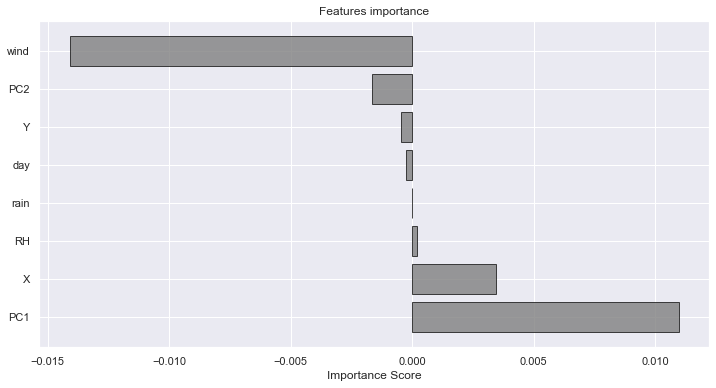

In [ ]:
# Plot the features importance
plt.figure(figsize=(12,6))
imp = rfpimp.importances(best_RF_model_, pd.DataFrame(X_test,columns=X.columns), y_test,features=X.columns)
plt.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
plt.xlabel('Importance Score')
plt.title('Features importance')
plt.show()

**Comment:**

> We can clearly notice that X and PC1 features have a huge impact on the Random Forest model with importnace score higher than 0.02.

### 4. Bagging Regressor

In [ ]:
# Define parameters for cross validation
param = {"max_samples": [0.5, 1.0],
            "max_features": [0.5, 1.0],
            "bootstrap": [True, False],
            "bootstrap_features": [True, False]}

# Define the model
estimator = BaggingRegressor()

# Compute cross validation
grid_search_cv = GridSearchCV(estimator, param, cv=5)

# Train the model
grid_search_cv.fit(X_train, y_train)

# Retrieve best parameters
best_param = grid_search_cv.best_estimator_
print('Best parameters = ',best_param)

Best parameters =  BaggingRegressor(bootstrap_features=True, max_samples=0.5)


In [ ]:
# Build the best model
best_model_bagg = BaggingRegressor(bootstrap_features=best_param.bootstrap_features,
                                   max_features=best_param.max_features, 
                                   max_samples=best_param.max_samples)
# Train best model
best_model_bagg.fit(X_train,y_train)

# Predict
y_pred_bagg = best_model_bagg.predict(X_test)

# Apply the inverse of the transformation
y_pred_bagg = np.exp(y_pred_bagg)-1

print("Bagging MAE :", np.round(mean_absolute_error(y_pred_bagg,y_test_),3))
print("Bagging RMSE :", np.round(mean_squared_error(y_pred_bagg,y_test_,squared=False),3))

Bagging MAE : 7.073
Bagging RMSE : 14.878


### 5. Gradient Boosting Regressor

In [ ]:
# Define parameters for cross validation
param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

# Define the model
estimator = GradientBoostingRegressor() 

# Compute cross validation
classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid)

# Train the model
classifier.fit(X_train, y_train)

# Retrieve best parameters
best_param = classifier.best_estimator_ 
print('Best parameters = ',best_param)

Best parameters =  GradientBoostingRegressor(learning_rate=0.02, max_depth=4, max_features=1.0,
                          min_samples_leaf=3)


In [ ]:
# Build the best model
best_model_boo = GradientBoostingRegressor(learning_rate=best_param.learning_rate,
                                       max_depth=best_param.max_depth, 
                                       max_features=best_param.max_features,
                                       min_samples_leaf=best_param.min_samples_leaf)
# Train best model
best_model_boo.fit(X_train,y_train)

# Predict
y_pred_boo = best_model_boo.predict(X_test)

# Apply the inverse of the transformation
y_pred_boo_ = np.exp(y_pred_boo)-1

print("Gradient Boosting MAE :", np.round(mean_absolute_error(y_pred_boo_,y_test_),3))
print("Gradient Boosting RMSE :", np.round(mean_squared_error(y_pred_boo_,y_test_,squared=False),3))

Gradient Boosting MAE : 7.018
Gradient Boosting RMSE : 15.162


**Interpretations:**

![image-3.png](attachment:image-3.png)

> * From the table above, we can remark that all the models that we built previously give close RMSE and MAE values which is expected considering the small size of the data. <br><br>
> * The Bagging and the SVR are the best two models to predict the forest fires with the lowest RMSE. <br><br>
> * The bagging regression model provides the secon best RMSE score among all the models. In fact, it learns independently from each learner in parallel and combines them following some kind of deterministic averaging process. Thus, Bagging is much faster than the other models.
<br><br>
$\Longrightarrow$ All the machine learning models that we have implemented looks ineffiecient to a give us a good predecting results. Consequently, we propose to build some deep learning models.

## Neural Network

* **One hidden layer NN**

In [ ]:
# The number of predectors  
n = X.shape[1]

# Create the model
model  = Sequential ()

# Add the hidden layer
model.add (Dense (units=5, activation='relu', input_shape= (n,))) 
model.add (Dense (units=1 , activation= 'relu'))

# Display the model summary 
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model 
model.compile (optimizer= Adam (0.01) , loss='mean_squared_error',metrics = ['MeanAbsoluteError'])

In [ ]:
# Fit the model 
n_epochs= 10
batch_size= 32

model.fit (X_train, y_train , epochs=n_epochs, batch_size= batch_size, validation_split=0.2)

Train on 300 samples, validate on 75 samples
Epoch 1/10
300/300 [==============================] - 0s 346us/sample - loss: 1.6967 - mean_absolute_error: 1.0982 - val_loss: 1.3020 - val_mean_absolute_error: 0.9985
Epoch 2/10
300/300 [==============================] - 0s 401us/sample - loss: 1.6353 - mean_absolute_error: 1.0602 - val_loss: 1.1750 - val_mean_absolute_error: 0.9350
Epoch 3/10
300/300 [==============================] - 0s 357us/sample - loss: 1.6456 - mean_absolute_error: 1.0426 - val_loss: 1.1782 - val_mean_absolute_error: 0.9315
Epoch 4/10
300/300 [==============================] - 0s 353us/sample - loss: 1.6539 - mean_absolute_error: 1.0788 - val_loss: 1.2565 - val_mean_absolute_error: 0.9828
Epoch 5/10
300/300 [==============================] - 0s 307us/sample - loss: 1.6322 - mean_absolute_error: 1.0595 - val_loss: 1.2148 - val_mean_absolute_error: 0.9444
Epoch 6/10
300/300 [==============================] - 0s 327us/sample - loss: 1.6321 - mean_absolute_error: 1.0441 

* **Two hidden layers NN**

In [ ]:
# Number of Predectors
n = X.shape[1]

# Create the model

model  = Sequential ()

# Add the first hidden layer
model.add (Dense (units=5, activation='relu', input_shape= (n,)))

# Add the second hidden layer
model.add (Dense (units=3, activation='relu')) 
model.add (Dense (units=1 , activation= 'relu'))

# Display the model summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model 
model.compile (optimizer= Adam (0.01) , loss='mean_squared_error',metrics = ['MeanAbsoluteError'])

In [ ]:
# Fit the model 
n_epochs= 10
batch_size= 32

model.fit (X_train, y_train , epochs=n_epochs, batch_size= batch_size, validation_split=0.2)

Train on 300 samples, validate on 75 samples
Epoch 1/10
300/300 [==============================] - 0s 303us/sample - loss: 2.9168 - mean_absolute_error: 1.0929 - val_loss: 1.7474 - val_mean_absolute_error: 0.8369
Epoch 2/10
300/300 [==============================] - 0s 314us/sample - loss: 2.9168 - mean_absolute_error: 1.0929 - val_loss: 1.7474 - val_mean_absolute_error: 0.8369
Epoch 3/10
300/300 [==============================] - 0s 346us/sample - loss: 2.9168 - mean_absolute_error: 1.0929 - val_loss: 1.7474 - val_mean_absolute_error: 0.8369
Epoch 4/10
300/300 [==============================] - 0s 344us/sample - loss: 2.9168 - mean_absolute_error: 1.0929 - val_loss: 1.7474 - val_mean_absolute_error: 0.8369
Epoch 5/10
300/300 [==============================] - 0s 299us/sample - loss: 2.9168 - mean_absolute_error: 1.0929 - val_loss: 1.7474 - val_mean_absolute_error: 0.8369
Epoch 6/10
300/300 [==============================] - 0s 344us/sample - loss: 2.9168 - mean_absolute_error: 1.0929 

**Interpretations:**

> - From the previous results, we notice that the first neural network architecture with one hidden layer of size 5 is able, after 10 epochs, to achieve the value 1.63 for the Mean Squared Error and 1.05 for Mean Absolute Error on the training dataset. These values are very close to the results of the metrics on the validation dataset. 
<br><br>
> - After adding another hidden layer of size 3, we notice that all these values are higher than the first architecture. In fact, the Mean Squared Error increases from 1.63 to 2.91 on the training dataset. Also, the Mean Absolute Error increases from 1.05 to 1.092. 
<br><br>
$\Longrightarrow$ We conclude that the first architecure achieves better prediction results of the forest fire area. In addition, the deep learning technique gives better results than all the previous machine learning models.  

## Conclusion 

In this project, all these algorithms use geographical (Fire location), temporal (Month and Day), Fire Weather varibles and weather variables (RH, Temp, Rain, Wind) to predict the area burned by forest fires in the Montesinho Natural Park in Portugal.
<br><br>
Here we used several models to predict area burned where, after multiple models, the final model contained X, Y, day, RH, wind, rain predictors with addional interactive terms. However, the final model achieved 1.5492 for the mean squared error and  0.992 for the mean absolute error; meaning there is likely to be a large error rate for any predictions made. This was largely due to the limited number of data cases and releativly low level correlations between the predictor variables and area outcome measure.